# 1. Setup and Library Imports

In [1]:
pip install xgboost lightgbm catboost

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 99.2/99.2 MB 8.1 MB/s eta 0:00:00


In [2]:
# Core libraries
import pandas as pd
import numpy as np
import time

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

# Machine Learning Models and Classifiers
from sklearn.linear_model import LogisticRegression, SGDClassifier, Perceptron, PassiveAggressiveClassifier, RidgeClassifier, Perceptron
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier, ExtraTreesClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.neighbors import KNeighborsClassifier, RadiusNeighborsClassifier
from sklearn.naive_bayes import GaussianNB, BernoulliNB, ComplementNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF, Matern, RationalQuadratic, DotProduct, WhiteKernel
from sklearn.kernel_ridge import KernelRidge
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from xgboost import XGBClassifier
import xgboost
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier
from sklearn.neural_network import MLPClassifier

# Model Selection and Validation
from sklearn.model_selection import StratifiedKFold, cross_val_score, GridSearchCV, RandomizedSearchCV, train_test_split, learning_curve

# Model Evaluation and Scoring Methods
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix, roc_curve, make_scorer, fbeta_score, ConfusionMatrixDisplay, precision_recall_curve, PrecisionRecallDisplay, auc, average_precision_score
import shap

# Model Saving and Loading
import joblib
import os

In [3]:
# General settings
pd.set_option('display.max_columns', None)
RANDOM_STATE = 42

# 2. Load Training and Test Data

In [4]:
# Load the training dataset from 'train.csv'
train_df = pd.read_csv('train.csv')
# Load the initial test dataset from 'test.csv'
temp_df = pd.read_csv('test.csv')

# Split the 'temp_df' into validation and final test sets
val_df, test_df = train_test_split(temp_df, test_size=0.5, random_state=42, stratify=temp_df['target'])

# Separate features (X) and target (y) for the training dataset
X_train = train_df.drop(columns='target')
y_train = train_df['target']

# Separate features (X) and target (y) for the validation dataset
X_val = val_df.drop(columns='target')
y_val = val_df['target']

# Separate features (X) and target (y) for the final test dataset
X_test = test_df.drop(columns='target')
y_test = test_df['target']

# Print the dimensions (shape) of the resulting datasets to verify the split
print("Dimensions of X_train:", X_train.shape)
print("Dimensions of y_train:", y_train.shape)
print("Dimensions of X_val:", X_val.shape)
print("Dimensions of y_val:", y_val.shape)
print("Dimensions of X_test:", X_test.shape)
print("Dimensions of y_test:", y_test.shape)

Dimensions of X_train: (5258, 41)
Dimensions of y_train: (5258,)
Dimensions of X_val: (661, 41)
Dimensions of y_val: (661,)
Dimensions of X_test: (662, 41)
Dimensions of y_test: (662,)


# 3. Baseline Model Selection and Training

In [ ]:
# Select an appropriate baseline model (Logistic Regression in this case)
baseline_model = LogisticRegression(random_state=RANDOM_STATE, max_iter=1000)

# Train the baseline model using the training data
baseline_model.fit(X_train, y_train)

LogisticRegression(max_iter=1000, random_state=42)

In [ ]:
# Make predictions on the training data
y_pred_train = baseline_model.predict(X_train)
# Get probability estimates for the positive class (class 1)
y_pred_proba_train = baseline_model.predict_proba(X_train)[:, 1]

# Evaluate the baseline model on the training data
print("BASELINE MODEL EVALUATION ON TRAINING DATA")
accuracy_train = accuracy_score(y_train, y_pred_train)
precision_train = precision_score(y_train, y_pred_train, pos_label=1, zero_division=0)
recall_train = recall_score(y_train, y_pred_train, pos_label=1, zero_division=0)
f1_train = f1_score(y_train, y_pred_train, pos_label=1, zero_division=0)
f2_train = fbeta_score(y_train, y_pred_train, beta=2, pos_label=1, zero_division=0)

print(f"Recall (Positive Class): {recall_train:.4f}")
print(f"Precision (Positive Class): {precision_train:.4f}")
print(f"F1-score (Positive Class): {f1_train:.4f}")
print(f"F2-score (Positive Class): {f2_train:.4f}")
print(f"Accuracy: {accuracy_train:.4f}")

print("\nCLASSIFICATION REPORT FOR TRAINING DATA")
print(classification_report(y_train, y_pred_train, zero_division=0))

BASELINE MODEL EVALUATION ON TRAINING DATA
Recall (Positive Class): 0.7868
Precision (Positive Class): 0.8492
F1-score (Positive Class): 0.8168
F2-score (Positive Class): 0.7985
Accuracy: 0.8208

CLASSIFICATION REPORT FOR TRAINING DATA
              precision    recall  f1-score   support

           0       0.80      0.86      0.82      2589
           1       0.85      0.79      0.82      2669

    accuracy                           0.82      5258
   macro avg       0.82      0.82      0.82      5258
weighted avg       0.82      0.82      0.82      5258



In [ ]:
# Make predictions on the val data
y_pred_val = baseline_model.predict(X_val)
# Get probability estimates for the positive class (class 1)
y_pred_proba_val = baseline_model.predict_proba(X_val)[:, 1]

# Evaluate the baseline model on the val data
print("BASELINE MODEL EVALUATION ON val DATA")
accuracy_val = accuracy_score(y_val, y_pred_val)
precision_val = precision_score(y_val, y_pred_val, pos_label=1, zero_division=0)
recall_val = recall_score(y_val, y_pred_val, pos_label=1, zero_division=0)
f1_val = f1_score(y_val, y_pred_val, pos_label=1, zero_division=0)
f2_val = fbeta_score(y_val, y_pred_val, beta=2, pos_label=1, zero_division=0)

print(f"Recall (Positive Class): {recall_val:.4f}")
print(f"Precision (Positive Class): {precision_val:.4f}")
print(f"F1-score (Positive Class): {f1_val:.4f}")
print(f"F2-score (Positive Class): {f2_val:.4f}")
print(f"Accuracy: {accuracy_val:.4f}")

print("\nCLASSIFICATION REPORT FOR val DATA")
print(classification_report(y_val, y_pred_val, zero_division=0))

BASELINE MODEL EVALUATION ON val DATA
Recall (Positive Class): 0.5566
Precision (Positive Class): 0.4370
F1-score (Positive Class): 0.4896
F2-score (Positive Class): 0.5277
Accuracy: 0.8139

CLASSIFICATION REPORT FOR val DATA
              precision    recall  f1-score   support

           0       0.91      0.86      0.89       555
           1       0.44      0.56      0.49       106

    accuracy                           0.81       661
   macro avg       0.67      0.71      0.69       661
weighted avg       0.83      0.81      0.82       661



# 4. Candidate Model Selection and Initial Training

### Linear Models

In [ ]:
# Define all model categories
models_linear = {
    # Linear Models
    "Logistic Regression (L1, C=0.1)": LogisticRegression(penalty='l1', C=0.1, solver='liblinear', random_state=RANDOM_STATE, max_iter=1000),
    "Logistic Regression (L2, C=1.0)": LogisticRegression(penalty='l2', C=1.0, random_state=RANDOM_STATE, max_iter=1000),
    "SGD Classifier (ElasticNet)": SGDClassifier(penalty='elasticnet', alpha=0.01, l1_ratio=0.15, loss='log_loss', random_state=RANDOM_STATE, max_iter=1000, tol=1e-3)
}

# F2 Score
f2_scorer = make_scorer(fbeta_score, beta=2, zero_division=0)

results = {}
failed_models = []

for i, (model_name, model) in enumerate(models_linear.items(), 1):
    # Cross-Validation on Train Data
    start_time = time.time()
    cv_scores = cross_val_score(
        model, X_train, y_train,
        cv=5, scoring=f2_scorer, n_jobs=-1
    )
    cv_time = time.time() - start_time

    cv_mean = cv_scores.mean()
    cv_std = cv_scores.std()

    # Train model and evaluate on Validation Set
    start_time = time.time()
    model.fit(X_train, y_train)
    train_time = time.time() - start_time

    # Predictions
    start_time = time.time()
    y_val_pred = model.predict(X_val)
    inference_time = time.time() - start_time

    # Probability predictions (if available)
    y_val_pred_proba = None
    if hasattr(model, 'predict_proba'):
        y_val_pred_proba = model.predict_proba(X_val)[:, 1]
    elif hasattr(model, 'decision_function'):
        y_val_pred_proba = model.decision_function(X_val)

    # F2 Score on validation set
    test_f2 = fbeta_score(y_val, y_val_pred, beta=2, zero_division=0)

    # Store results
    results[model_name] = {
        'model': model,
        'cv_mean': cv_mean,
        'cv_scores': cv_scores,
        'test_f2': test_f2,
        'y_val_pred': y_val_pred,
        'y_val_pred_proba': y_val_pred_proba,
        'cv_time': cv_time,
        'train_time': train_time,
        'inference_time': inference_time
    }

def create_detailed_analysis_table(results):
    """
    Create a comprehensive analysis table with all requested metrics
    """

    detailed_analysis = []

    for model_name, model_data in results.items():
        model = model_data['model']
        y_pred = model_data['y_val_pred']

        # Calculate precision
        precision = precision_score(y_val, y_pred, zero_division=0)

        # Calculate recall
        recall = recall_score(y_val, y_pred, zero_division=0)

        # Compile all metrics
        detailed_analysis.append({
            'Model': model_name,
            'F2 Score': model_data['test_f2'],
            'CV F2': model_data['cv_mean'],
            'Precision': precision,
            'Recall': recall,
            'Training Time': model_data['train_time']
        })

    # Create DataFrame
    analysis_df = pd.DataFrame(detailed_analysis)

    # Sort by F2 Score (descending)
    analysis_df = analysis_df.sort_values('F2 Score', ascending=False).reset_index(drop=True)

    return analysis_df

# Create the detailed analysis table
detailed_analysis_df = create_detailed_analysis_table(results)

# Display the table
display(detailed_analysis_df.round(4))

,Model,F2 Score,CV F2,Precision,Recall,Training Time
0,SGD Classifier (ElasticNet),0.5769,0.7801,0.3966,0.6509,0.0350
1,"Logistic Regression (L1, C=0.1)",0.5319,0.7763,0.4286,0.5660,0.2959
2,"Logistic Regression (L2, C=1.0)",0.5277,0.7760,0.4370,0.5566,0.0569


### Kernel-Based Models

In [ ]:
# Define all kernel model categories
models_kernel = {
    "SVC (RBF Kernel)": SVC(kernel='rbf', C=1, random_state=RANDOM_STATE, probability=True),
    "SVC (Polynomial Kernel, degree=3)": SVC(kernel='poly', degree=3, C=1, random_state=RANDOM_STATE, probability=True),
    "Gaussian Process Classifier": GaussianProcessClassifier(random_state=RANDOM_STATE)
}

# F2 Score
f2_scorer = make_scorer(fbeta_score, beta=2, zero_division=0)

results = {}
failed_models = []

for i, (model_name, model) in enumerate(models_kernel.items(), 1):
    # Cross-Validation on Train Data
    start_time = time.time()
    cv_scores = cross_val_score(
        model, X_train, y_train,
        cv=5, scoring=f2_scorer, n_jobs=-1
    )
    cv_time = time.time() - start_time

    cv_mean = cv_scores.mean()
    cv_std = cv_scores.std()

    # Train model and evaluate on Validation Set
    start_time = time.time()
    model.fit(X_train, y_train)
    train_time = time.time() - start_time

    # Predictions
    start_time = time.time()
    y_val_pred = model.predict(X_val)
    inference_time = time.time() - start_time

    # Probability predictions (if available)
    y_val_pred_proba = None
    if hasattr(model, 'predict_proba'):
        y_val_pred_proba = model.predict_proba(X_val)[:, 1]
    elif hasattr(model, 'decision_function'):
        y_val_pred_proba = model.decision_function(X_val)

    # F2 Score on validation set
    test_f2 = fbeta_score(y_val, y_val_pred, beta=2, zero_division=0)

    # Store results
    results[model_name] = {
        'model': model,
        'cv_mean': cv_mean,
        'cv_std': cv_std,
        'cv_scores': cv_scores,
        'test_f2': test_f2,
        'y_val_pred': y_val_pred,
        'y_val_pred_proba': y_val_pred_proba,
        'cv_time': cv_time,
        'train_time': train_time,
        'inference_time': inference_time
    }

def create_detailed_analysis_table(results):
    """
    Create a comprehensive analysis table with all requested metrics
    """

    detailed_analysis = []

    for model_name, model_data in results.items():
        model = model_data['model']
        y_pred = model_data['y_val_pred']

        # Calculate precision
        precision = precision_score(y_val, y_pred, zero_division=0)

        # Calculate recall
        recall = recall_score(y_val, y_pred, zero_division=0)

        # Compile all metrics
        detailed_analysis.append({
            'Model': model_name,
            'F2 Score': model_data['test_f2'],
            'CV F2': model_data['cv_mean'],
            'Precision': precision,
            'Recall': recall,
            'Training Time': model_data['train_time']
        })

    # Create DataFrame
    analysis_df = pd.DataFrame(detailed_analysis)

    # Sort by F2 Score (descending)
    analysis_df = analysis_df.sort_values('F2 Score', ascending=False).reset_index(drop=True)

    return analysis_df

# Create the detailed analysis table
detailed_analysis_df = create_detailed_analysis_table(results)

# Display the table
display(detailed_analysis_df.round(4))

,Model,F2 Score,CV F2,Precision,Recall,Training Time
0,Gaussian Process Classifier,0.9276,0.9881,0.8696,0.9434,47.3459
1,"SVC (Polynomial Kernel, degree=3)",0.7048,0.9329,0.7327,0.6981,5.2473
2,SVC (RBF Kernel),0.6513,0.9059,0.6939,0.6415,13.9355


### Instance-Based Models

In [ ]:
# Define all model categories
models_instance = {
    "K-Nearest Neighbors": KNeighborsClassifier(n_neighbors=5),
    "KNN (Distance Weighted)": KNeighborsClassifier(n_neighbors=5, weights='distance'),
    "KNN (Uniform Weighted)": KNeighborsClassifier(n_neighbors=5, weights='uniform')
}

# F2 Score
f2_scorer = make_scorer(fbeta_score, beta=2, zero_division=0)

results = {}
failed_models = []

for i, (model_name, model) in enumerate(models_instance.items(), 1):
    # Cross-Validation on Train Data
    start_time = time.time()
    cv_scores = cross_val_score(
        model, X_train, y_train,
        cv=5, scoring=f2_scorer, n_jobs=-1
    )
    cv_time = time.time() - start_time

    cv_mean = cv_scores.mean()
    cv_std = cv_scores.std()

    # Train model and evaluate on Validation Set
    start_time = time.time()
    model.fit(X_train, y_train)
    train_time = time.time() - start_time

    # Predictions
    start_time = time.time()
    y_val_pred = model.predict(X_val)
    inference_time = time.time() - start_time

    # Probability predictions (if available)
    y_val_pred_proba = None
    if hasattr(model, 'predict_proba'):
        y_val_pred_proba = model.predict_proba(X_val)[:, 1]
    elif hasattr(model, 'decision_function'):
        y_val_pred_proba = model.decision_function(X_val)

    # F2 Score on validation set
    test_f2 = fbeta_score(y_val, y_val_pred, beta=2, zero_division=0)

    # Store results
    results[model_name] = {
        'model': model,
        'cv_mean': cv_mean,
        'cv_scores': cv_scores,
        'test_f2': test_f2,
        'y_val_pred': y_val_pred,
        'y_val_pred_proba': y_val_pred_proba,
        'cv_time': cv_time,
        'train_time': train_time,
        'inference_time': inference_time
    }

def create_detailed_analysis_table(results):
    """
    Create a comprehensive analysis table with all requested metrics
    """

    detailed_analysis = []

    for model_name, model_data in results.items():
        model = model_data['model']
        y_pred = model_data['y_val_pred']

        # Calculate precision
        precision = precision_score(y_val, y_pred, zero_division=0)

        # Calculate recall
        recall = recall_score(y_val, y_pred, zero_division=0)

        # Compile all metrics
        detailed_analysis.append({
            'Model': model_name,
            'F2 Score': model_data['test_f2'],
            'CV F2': model_data['cv_mean'],
            'Precision': precision,
            'Recall': recall,
            'Training Time': model_data['train_time']
        })

    # Create DataFrame
    analysis_df = pd.DataFrame(detailed_analysis)

    # Sort by F2 Score (descending)
    analysis_df = analysis_df.sort_values('F2 Score', ascending=False).reset_index(drop=True)

    return analysis_df

# Create the detailed analysis table
detailed_analysis_df = create_detailed_analysis_table(results)

# Display the table
display(detailed_analysis_df.round(4))

,Model,F2 Score,CV F2,Precision,Recall,Training Time
0,KNN (Distance Weighted),0.8834,0.9713,0.7042,0.9434,0.0034
1,K-Nearest Neighbors,0.7622,0.9399,0.4310,0.9434,0.0034
2,KNN (Uniform Weighted),0.7622,0.9399,0.4310,0.9434,0.0033


### Tree-Based Models

In [ ]:
# Define all model categories
models_tree = {
    "Decision Tree": DecisionTreeClassifier(random_state=RANDOM_STATE),
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=RANDOM_STATE),
    "Extra Trees": ExtraTreesClassifier(n_estimators=100, random_state=RANDOM_STATE)
}

# F2 Score
f2_scorer = make_scorer(fbeta_score, beta=2, zero_division=0)

results = {}
failed_models = []

for i, (model_name, model) in enumerate(models_tree.items(), 1):
    # Cross-Validation on Train Data
    start_time = time.time()
    cv_scores = cross_val_score(
        model, X_train, y_train,
        cv=5, scoring=f2_scorer, n_jobs=-1
    )
    cv_time = time.time() - start_time

    cv_mean = cv_scores.mean()
    cv_std = cv_scores.std()

    # Train model and evaluate on Validation Set
    start_time = time.time()
    model.fit(X_train, y_train)
    train_time = time.time() - start_time

    # Predictions
    start_time = time.time()
    y_val_pred = model.predict(X_val)
    inference_time = time.time() - start_time

    # Probability predictions (if available)
    y_val_pred_proba = None
    if hasattr(model, 'predict_proba'):
        y_val_pred_proba = model.predict_proba(X_val)[:, 1]
    elif hasattr(model, 'decision_function'):
        y_val_pred_proba = model.decision_function(X_val)

    # F2 Score on validation set
    test_f2 = fbeta_score(y_val, y_val_pred, beta=2, zero_division=0)

    # Store results
    results[model_name] = {
        'model': model,
        'cv_mean': cv_mean,
        'cv_scores': cv_scores,
        'test_f2': test_f2,
        'y_val_pred': y_val_pred,
        'y_val_pred_proba': y_val_pred_proba,
        'cv_time': cv_time,
        'train_time': train_time,
        'inference_time': inference_time
    }

def create_detailed_analysis_table(results):
    """
    Create a comprehensive analysis table with all requested metrics
    """

    detailed_analysis = []

    for model_name, model_data in results.items():
        model = model_data['model']
        y_pred = model_data['y_val_pred']

        # Calculate precision
        precision = precision_score(y_val, y_pred, zero_division=0)

        # Calculate recall
        recall = recall_score(y_val, y_pred, zero_division=0)

        # Compile all metrics
        detailed_analysis.append({
            'Model': model_name,
            'F2 Score': model_data['test_f2'],
            'CV F2': model_data['cv_mean'],
            'Precision': precision,
            'Recall': recall,
            'Training Time': model_data['train_time']
        })

    # Create DataFrame
    analysis_df = pd.DataFrame(detailed_analysis)

    # Sort by F2 Score (descending)
    analysis_df = analysis_df.sort_values('F2 Score', ascending=False).reset_index(drop=True)

    return analysis_df

# Create the detailed analysis table
detailed_analysis_df = create_detailed_analysis_table(results)

# Display the table
display(detailed_analysis_df.round(4))

,Model,F2 Score,CV F2,Precision,Recall,Training Time
0,Random Forest,0.9178,0.9784,0.9697,0.9057,1.4239
1,Extra Trees,0.9160,0.9760,0.9600,0.9057,0.5285
2,Decision Tree,0.8621,0.9313,0.9184,0.8491,0.0874


### Boosting Models

In [ ]:
# Define all boosting model categories
models_boosting = {
    "AdaBoost": AdaBoostClassifier(random_state=RANDOM_STATE),
    "XGBoost": XGBClassifier(random_state=RANDOM_STATE, eval_metric='logloss'),
    "CatBoost": CatBoostClassifier(verbose=0, random_state=RANDOM_STATE)
}

# F2 Score
f2_scorer = make_scorer(fbeta_score, beta=2, zero_division=0)

results = {}
failed_models = []

for i, (model_name, model) in enumerate(models_boosting.items(), 1):
    # Cross-Validation on Train Data
    start_time = time.time()
    cv_scores = cross_val_score(
        model, X_train, y_train,
        cv=5, scoring=f2_scorer, n_jobs=-1
    )
    cv_time = time.time() - start_time

    cv_mean = cv_scores.mean()
    cv_std = cv_scores.std()

    # Train model and evaluate on Validation Set
    start_time = time.time()
    model.fit(X_train, y_train)
    train_time = time.time() - start_time

    # Predictions
    start_time = time.time()
    y_val_pred = model.predict(X_val)
    inference_time = time.time() - start_time

    # Probability predictions (if available)
    y_val_pred_proba = None
    if hasattr(model, 'predict_proba'):
        y_val_pred_proba = model.predict_proba(X_val)[:, 1]
    elif hasattr(model, 'decision_function'):
        y_val_pred_proba = model.decision_function(X_val)

    # F2 Score on validation set
    test_f2 = fbeta_score(y_val, y_val_pred, beta=2, zero_division=0)

    # Store results
    results[model_name] = {
        'model': model,
        'cv_mean': cv_mean,
        'cv_scores': cv_scores,
        'test_f2': test_f2,
        'y_val_pred': y_val_pred,
        'y_val_pred_proba': y_val_pred_proba,
        'cv_time': cv_time,
        'train_time': train_time,
        'inference_time': inference_time
    }

def create_detailed_analysis_table(results):
    """
    Create a comprehensive analysis table with all requested metrics
    """

    detailed_analysis = []

    for model_name, model_data in results.items():
        model = model_data['model']
        y_pred = model_data['y_val_pred']

        # Calculate precision
        precision = precision_score(y_val, y_pred, zero_division=0)

        # Calculate recall
        recall = recall_score(y_val, y_pred, zero_division=0)

        # Compile all metrics
        detailed_analysis.append({
            'Model': model_name,
            'F2 Score': model_data['test_f2'],
            'CV F2': model_data['cv_mean'],
            'Precision': precision,
            'Recall': recall,
            'Training Time': model_data['train_time']
        })

    # Create DataFrame
    analysis_df = pd.DataFrame(detailed_analysis)

    # Sort by F2 Score (descending)
    analysis_df = analysis_df.sort_values('F2 Score', ascending=False).reset_index(drop=True)

    return analysis_df

# Create the detailed analysis table
detailed_analysis_df = create_detailed_analysis_table(results)

# Display the table
display(detailed_analysis_df.round(4))

,Model,F2 Score,CV F2,Precision,Recall,Training Time
0,XGBoost,0.9411,0.9799,0.9706,0.9340,0.3008
1,CatBoost,0.8925,0.9741,0.9588,0.8774,8.3519
2,AdaBoost,0.5603,0.7994,0.4000,0.6226,0.5210


### Neural Networks

In [ ]:
# Define all model categories
models_neural = {
    "Multi-layer Perceptron (MLP)": MLPClassifier(random_state=RANDOM_STATE, max_iter=1000),
    "Perceptron": Perceptron(random_state=RANDOM_STATE, max_iter=1000),
    "Stochastic Gradient Descent (Hinge Loss)": SGDClassifier(loss='hinge', random_state=RANDOM_STATE, max_iter=1000)
}

# F2 Score
f2_scorer = make_scorer(fbeta_score, beta=2, zero_division=0)

results = {}
failed_models = []

for i, (model_name, model) in enumerate(models_neural.items(), 1):
    # Cross-Validation on Train Data
    start_time = time.time()
    cv_scores = cross_val_score(
        model, X_train, y_train,
        cv=5, scoring=f2_scorer, n_jobs=-1
    )
    cv_time = time.time() - start_time

    cv_mean = cv_scores.mean()
    cv_std = cv_scores.std()

    # Train model and evaluate on Validation Set
    start_time = time.time()
    model.fit(X_train, y_train)
    train_time = time.time() - start_time

    # Predictions
    start_time = time.time()
    y_val_pred = model.predict(X_val)
    inference_time = time.time() - start_time

    # Probability predictions (if available)
    y_val_pred_proba = None
    if hasattr(model, 'predict_proba'):
        y_val_pred_proba = model.predict_proba(X_val)[:, 1]
    elif hasattr(model, 'decision_function'):
        y_val_pred_proba = model.decision_function(X_val)

    # F2 Score on validation set
    test_f2 = fbeta_score(y_val, y_val_pred, beta=2, zero_division=0)

    # Store results
    results[model_name] = {
        'model': model,
        'cv_mean': cv_mean,
        'cv_scores': cv_scores,
        'test_f2': test_f2,
        'y_val_pred': y_val_pred,
        'y_val_pred_proba': y_val_pred_proba,
        'cv_time': cv_time,
        'train_time': train_time,
        'inference_time': inference_time
    }

def create_detailed_analysis_table(results):
    """
    Create a comprehensive analysis table with all requested metrics
    """

    detailed_analysis = []

    for model_name, model_data in results.items():
        model = model_data['model']
        y_pred = model_data['y_val_pred']

        # Calculate precision
        precision = precision_score(y_val, y_pred, zero_division=0)

        # Calculate recall
        recall = recall_score(y_val, y_pred, zero_division=0)

        # Compile all metrics
        detailed_analysis.append({
            'Model': model_name,
            'F2 Score': model_data['test_f2'],
            'CV F2': model_data['cv_mean'],
            'Precision': precision,
            'Recall': recall,
            'Training Time': model_data['train_time']
        })

    # Create DataFrame
    analysis_df = pd.DataFrame(detailed_analysis)

    # Sort by F2 Score (descending)
    analysis_df = analysis_df.sort_values('F2 Score', ascending=False).reset_index(drop=True)

    return analysis_df

# Create the detailed analysis table
detailed_analysis_df = create_detailed_analysis_table(results)

# Display the table
display(detailed_analysis_df.round(4))

,Model,F2 Score,CV F2,Precision,Recall,Training Time
0,Multi-layer Perceptron (MLP),0.9100,0.9727,0.9694,0.8962,5.6936
1,Stochastic Gradient Descent (Hinge Loss),0.4771,0.7641,0.4298,0.4906,0.0759
2,Perceptron,0.2516,0.7354,0.4528,0.2264,0.0161


# 5. Hyperparameter Tuning

| Rank | Model                              | F2 Score | CV F2  | Precision | Recall | Training Time |
|------|------------------------------------|----------|--------|-----------|--------|---------------|
| **1**    | **XGBoost**                        | 0.9411   | 0.9799 | 0.9706    | 0.934  | 0.3008       |
| **2**    | **Random Forest**                  | 0.9178   | 0.9784 | 0.9697    | 0.9057 | 1.4239        |
| **3**    | **Extra Trees**                    | 0.916    | 0.976  | 0.96      | 0.9057 | 0.5285        |
| **4**    | **Multi-layer Perceptron (MLP)**   | 0.91     | 0.9727 | 0.9694    | 0.8962 | 5.6936        |
| **5**    | **CatBoost**                       | 0.8925   | 0.9741 | 0.9588    | 0.8774 | 8.3519        |
| **6**    | **KNN (Distance Weighted)**        | 0.8834   | 0.9713 | 0.7042    | 0.9434 | 0.0034       |

#### Random Forest

In [ ]:
# Define F2 scorer
f2_scorer = make_scorer(fbeta_score, beta=2)

# Hyperparameter grid for Random Forest
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 5, 10, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2'],
    'criterion': ['gini', 'entropy']
}

# Initialize model
rf = RandomForestClassifier(random_state=42)

# Grid search CV
grid_search = GridSearchCV(
    estimator=rf,
    param_grid=param_grid,
    scoring=f2_scorer,
    cv=5,
    n_jobs=-1,
    verbose=1
)

# Fit to training data
grid_search.fit(X_train, y_train)

# Get the best model
best_model = grid_search.best_estimator_

# Evaluate
train_score = fbeta_score(y_train, best_model.predict(X_train), beta=2)
val_score = fbeta_score(y_val, best_model.predict(X_val), beta=2)
cv_score = grid_search.best_score_

# Output results
print("Best Parameters:", grid_search.best_params_)
print("Train F2 Score:", train_score)
print("Validation F2 Score:", val_score)
print("Best Cross-Validation F2 Score (cv=5):", cv_score)
print("Cross-validation folds used: 5")

Fitting 5 folds for each of 432 candidates, totalling 2160 fits
Best Parameters: {'criterion': 'entropy', 'max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 300}
Train F2 Score: 1.0
Validation F2 Score: 0.9099616858237548
Best Cross-Validation F2 Score (cv=5): 0.9811580571079359
Cross-validation folds used: 5


#### XGBoost

In [ ]:
# Define F2 scorer
f2_scorer = make_scorer(fbeta_score, beta=3)

# Hyperparameter grid for XGBoost
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 6, 10],
    'learning_rate': [0.01, 0.1, 0.2, 0.3],
    'subsample': [0.6, 0.8, 1.0],
    'colsample_bytree': [0.6, 0.8, 1.0],
    'gamma': [0, 1, 5]
}

# Initialize the model
xgb = XGBClassifier(
    objective='binary:logistic',
    random_state=42
)

# Grid search CV
grid_search = GridSearchCV(
    estimator=xgb,
    param_grid=param_grid,
    scoring=f2_scorer,
    cv=5,
    n_jobs=-1,
    verbose=1
)

# Fit to training data
grid_search.fit(X_train, y_train)

# Get the best model
best_model = grid_search.best_estimator_

# Evaluate
train_score = fbeta_score(y_train, best_model.predict(X_train), beta=3)
val_score = fbeta_score(y_val, best_model.predict(X_val), beta=3)
cv_score = grid_search.best_score_

# Output results
print("Best Parameters:", grid_search.best_params_)
print("Train F2 Score:", train_score)
print("Validation F2 Score:", val_score)
print("Best Cross-Validation F2 Score (cv=5):", cv_score)
print("Cross-validation folds used: 5")

Fitting 5 folds for each of 972 candidates, totalling 4860 fits
Best Parameters: {'colsample_bytree': 1.0, 'gamma': 0, 'learning_rate': 0.3, 'max_depth': 10, 'n_estimators': 200, 'subsample': 0.6}
Train F2 Score: 1.0
Validation F2 Score: 0.9108159392789373
Best Cross-Validation F2 Score (cv=5): 0.9836488472641122
Cross-validation folds used: 5


#### Extra Trees

In [ ]:
# Define F2 scorer
f2_scorer = make_scorer(fbeta_score, beta=3)

# Hyperparameter grid for Extra Trees
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 3, 5, 10],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2'],
    'criterion': ['gini', 'entropy']
}

# Initialize model
et = ExtraTreesClassifier(random_state=42)

# Grid search CV
grid_search = GridSearchCV(
    estimator=et,
    param_grid=param_grid,
    scoring=f2_scorer,
    cv=5,
    n_jobs=-1,
    verbose=1
)

# Fit to training data
grid_search.fit(X_train, y_train)

# Get the best model
best_model = grid_search.best_estimator_

# Evaluate
train_score = fbeta_score(y_train, best_model.predict(X_train), beta=3)
val_score = fbeta_score(y_val, best_model.predict(X_val), beta=3)
cv_score = grid_search.best_score_

# Output results
print("Best Parameters:", grid_search.best_params_)
print("Train F2 Score:", train_score)
print("Validation F2 Score:", val_score)
print("Best Cross-Validation F2 Score (cv=5):", cv_score)
print("Cross-validation folds used: 5")

Fitting 5 folds for each of 432 candidates, totalling 2160 fits
Best Parameters: {'criterion': 'entropy', 'max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 100}
Train F2 Score: 1.0
Validation F2 Score: 0.9108159392789373
Best Cross-Validation F2 Score (cv=5): 0.9772986865669854
Cross-validation folds used: 5


#### Multi-layer Perceptron (MLP)

In [ ]:
# Define F2 scorer
f2_scorer = make_scorer(fbeta_score, beta=3)

# Hyperparameter grid for MLP Classifier
param_grid = {
    'hidden_layer_sizes': [(50,), (100,), (50, 50)],
    'activation': ['relu', 'tanh'],
    'solver': ['adam', 'sgd'],
    'alpha': [0.0001, 0.001],
    'learning_rate': ['constant', 'adaptive'],
    'max_iter': [200, 500]
}

# Initialize model
mlp = MLPClassifier(random_state=42)

# Grid search CV
grid_search = GridSearchCV(
    estimator=mlp,
    param_grid=param_grid,
    scoring=f2_scorer,
    cv=5,
    n_jobs=-1,
    verbose=1
)

# Fit to training data
grid_search.fit(X_train, y_train)

# Get the best model
best_model = grid_search.best_estimator_

# Evaluate
train_score = fbeta_score(y_train, best_model.predict(X_train), beta=3)
val_score = fbeta_score(y_val, best_model.predict(X_val), beta=3)
cv_score = grid_search.best_score_

# Output results
print("Best Parameters:", grid_search.best_params_)
print("Train F2 Score:", train_score)
print("Validation F2 Score:", val_score)
print("Best Cross-Validation F2 Score (cv=5):", cv_score)
print("Cross-validation folds used: 5")

Fitting 5 folds for each of 96 candidates, totalling 480 fits
Best Parameters: {'activation': 'tanh', 'alpha': 0.0001, 'hidden_layer_sizes': (50, 50), 'learning_rate': 'constant', 'max_iter': 200, 'solver': 'adam'}
Train F2 Score: 1.0
Validation F2 Score: 0.8736942070275404
Best Cross-Validation F2 Score (cv=5): 0.9803833876768389
Cross-validation folds used: 5


#### KNN (Distance Weighted)

In [ ]:
# Define F2 scorer
f2_scorer = make_scorer(fbeta_score, beta=3)

# Hyperparameter grid for KNN Classifier with Distance Weighting
param_grid = {
    'n_neighbors': [3, 5, 7, 9, 11, 15],
    'weights': ['distance'],
    'algorithm': ['auto', 'ball_tree', 'kd_tree'],
    'p': [1, 2],
    'metric': ['minkowski']
}

# Initialize model
knn = KNeighborsClassifier()

# Grid search CV
grid_search = GridSearchCV(
    estimator=knn,
    param_grid=param_grid,
    scoring=f2_scorer,
    cv=5,
    n_jobs=-1,
    verbose=1
)

# Fit to training data
grid_search.fit(X_train, y_train)

# Get the best model
best_model = grid_search.best_estimator_

# Evaluate
train_score = fbeta_score(y_train, best_model.predict(X_train), beta=3)
val_score = fbeta_score(y_val, best_model.predict(X_val), beta=3)
cv_score = grid_search.best_score_

# Output results
print("Best Parameters:", grid_search.best_params_)
print("Train F2 Score:", train_score)
print("Validation F2 Score:", val_score)
print("Best Cross-Validation F2 Score (cv=5):", cv_score)
print("Cross-validation folds used: 5")

Fitting 5 folds for each of 36 candidates, totalling 180 fits
Best Parameters: {'algorithm': 'auto', 'metric': 'minkowski', 'n_neighbors': 3, 'p': 1, 'weights': 'distance'}
Train F2 Score: 1.0
Validation F2 Score: 0.9056603773584906
Best Cross-Validation F2 Score (cv=5): 0.9939969029592015
Cross-validation folds used: 5


#### CatBoost

In [ ]:
# Define F2 scorer
f2_scorer = make_scorer(fbeta_score, beta=3)

# Initialize model
catboost_model = CatBoostClassifier(verbose=0, random_state=42)

# Hyperparameter grid for CatBoost
param_grid = {
    'iterations': [100, 200, 300],
    'depth': [4, 6, 8],
    'learning_rate': [0.03, 0.1, 0.2],
    'l2_leaf_reg': [1, 3, 5]
}

# Grid search CV
grid_search = GridSearchCV(
    estimator=catboost_model,
    param_grid=param_grid,
    scoring=f2_scorer,
    cv=5,
    n_jobs=-1,
    verbose=1
)

# Fit to training data
grid_search.fit(X_train, y_train)

# Get the best model
best_model = grid_search.best_estimator_

# Evaluate
train_score = fbeta_score(y_train, best_model.predict(X_train), beta=3)
val_score = fbeta_score(y_val, best_model.predict(X_val), beta=3)
cv_score = grid_search.best_score_

# Output results
print("Best Parameters:", grid_search.best_params_)
print("Train F2 Score:", train_score)
print("Validation F2 Score:", val_score)
print("Best Cross-Validation F2 Score (cv=5):", cv_score)
print("Cross-validation folds used: 5")

Fitting 5 folds for each of 81 candidates, totalling 405 fits
Best Parameters: {'depth': 8, 'iterations': 300, 'l2_leaf_reg': 1, 'learning_rate': 0.1}
Train F2 Score: 1.0
Validation F2 Score: 0.9108159392789373
Best Cross-Validation F2 Score (cv=5): 0.9845431709545253
Cross-validation folds used: 5


# 6. Final Model

In [5]:
# Define all models and their specific hyperparameters
MODELS_TO_VALIDATE = {
    'RandomForest': {
        'model': RandomForestClassifier,
        'params': {
            'criterion': 'entropy',
            'max_depth': None,
            'max_features': 'sqrt',
            'min_samples_leaf': 1,
            'min_samples_split': 2,
            'n_estimators': 300
        }
    },
    'XGBoost': {
        'model': XGBClassifier,
        'params': {
            'colsample_bytree': 1.0,
            'gamma': 0,
            'learning_rate': 0.3,
            'max_depth': 10,
            'n_estimators': 200,
            'subsample': 0.6,
            'eval_metric': 'logloss'
        }
    },
    'ExtraTrees': {
        'model': ExtraTreesClassifier,
        'params': {
            'criterion': 'entropy',
            'max_depth': None,
            'max_features': 'sqrt',
            'min_samples_leaf': 1,
            'min_samples_split': 5,
            'n_estimators': 100
        }
    },
    'MLP': {
        'model': MLPClassifier,
        'params': {
            'activation': 'tanh',
            'alpha': 0.0001,
            'hidden_layer_sizes': (50, 50),
            'learning_rate': 'constant',
            'max_iter': 200,
            'solver': 'adam'
        }
    },
    'KNeighbors': {
        'model': KNeighborsClassifier,
        'params': {
            'algorithm': 'auto',
            'metric': 'minkowski',
            'n_neighbors': 3,
            'p': 1,
            'weights': 'distance'
        }
    },
    'CatBoost': {
        'model': CatBoostClassifier,
        'params': {
            'depth': 8,
            'iterations': 300,
            'l2_leaf_reg': 1,
            'learning_rate': 0.1,
            'verbose': 0
        }
    }
}

# List to store results for each model
all_results = []

# Custom scorer using F2 score
f2_scorer = make_scorer(fbeta_score, beta=2)

# Loop over each model
for model_name, config in MODELS_TO_VALIDATE.items():
    model_class = config['model']
    best_params = config['params']

    # Instantiate model
    model_instance = model_class(**best_params)

    # Cross-validation
    cv_scores = cross_val_score(model_instance, X_train, y_train, cv=5, scoring=f2_scorer, n_jobs=-1)

    # Train model
    model_instance.fit(X_train, y_train)

    # Predict on validation set & measure time
    start_time = time.time()
    y_pred_val = model_instance.predict(X_val)
    pred_time = time.time() - start_time

    # F2 score on validation set
    val_f2_score = fbeta_score(y_val, y_pred_val, beta=2)

    # Save results
    all_results.append({
        'Model': model_name,
        'CV_Mean_F2': np.mean(cv_scores),
        'CV_Std_Dev_F2': np.std(cv_scores),
        'Val_F2_Score': val_f2_score,
        'Val_Pred_Time_sec': round(pred_time, 4),
        'CV_Scores_Per_Fold': [round(s, 4) for s in cv_scores]
    })

# Final summary
final_summary_df = pd.DataFrame(all_results).sort_values(by='Val_F2_Score', ascending=False).reset_index(drop=True)

# Show result
display(final_summary_df)

,Model,CV_Mean_F2,CV_Std_Dev_F2,Val_F2_Score,Val_Pred_Time_sec,CV_Scores_Per_Fold
0,RandomForest,0.980264,0.021202,0.917782,0.0387,"[0.9384, 0.9846, 0.9921, 0.9906, 0.9955]"
1,CatBoost,0.984913,0.023436,0.917782,0.0020,"[0.9384, 0.9993, 0.9981, 0.9906, 0.9981]"
2,XGBoost,0.982371,0.028448,0.916031,0.0144,"[0.9257, 0.9966, 0.9989, 0.9918, 0.9989]"
3,ExtraTrees,0.975684,0.026460,0.916031,0.0163,"[0.9235, 0.9899, 0.9906, 0.9936, 0.9808]"
4,KNeighbors,0.989167,0.000913,0.905660,0.1399,"[0.9893, 0.9881, 0.9882, 0.99, 0.9904]"
5,MLP,0.978024,0.025986,0.888031,0.0033,"[0.9263, 0.9877, 0.9881, 0.9936, 0.9944]"


### Random Forest

* **High Predictive Accuracy and Model Stability**

    Demonstrates strong performance by achieving high F2 scores on test data while maintaining low variance across cross-validation folds, indicating a reliable and stable model.

* **Robust Overfitting Control via Ensemble Method**

    Utilizes a bagging technique—averaging predictions from multiple decorrelated trees—which inherently reduces model variance and provides strong resistance to overfitting.

* **Built-in Feature Importance for High Interpretability**

    Offers a clear and reliable feature ranking mechanism, allowing stakeholders to understand key predictive drivers and make data-informed business decisions.

* **Effective at Capturing Non-Linear Feature Interactions**

    The underlying tree-based structure naturally identifies complex, non-linear relationships and feature interactions without requiring extensive manual feature engineering.

* **Designed for Efficient, Parallelized Training**

    The algorithm is inherently parallelizable, as each decision tree is built independently. This allows for significant training speed-ups on multi-core systems, enhancing computational efficiency.

* **A Mature and Widely Adopted Industry Standard**

    As one of the most widely adopted models for classification, it benefits from a mature ecosystem, extensive documentation, and robust community support, particularly within the Scikit-learn framework.

### Training Final Model

In [21]:
# Define the best parameters found for RandomForest
best_params = {
    'criterion': 'entropy',
    'max_depth': None,
    'max_features': 'sqrt',
    'min_samples_leaf': 1,
    'min_samples_split': 2,
    'n_estimators': 300
}

# Create the final model
rf_model = RandomForestClassifier(**best_params, random_state=42)

# Train the model with the entire training dataset
start_time_train = time.time()
rf_model.fit(X_train, y_train)
end_time_train = time.time()
training_time = end_time_train - start_time_train

# Perform predictions on the test data
start_time_pred = time.time()
y_pred = rf_model.predict(X_test)
y_pred_proba = rf_model.predict_proba(X_test)[:, 1]
end_time_pred = time.time()
prediction_time = end_time_pred - start_time_pred

# Display Best Hyperparameters
print("Best Hyperparameters Used for RandomForest:")
for param, value in best_params.items():
    print(f"- {param}: {value}")

# Display F2-Score
f2 = fbeta_score(y_test, y_pred, beta=2, zero_division=0)
f2_scorer = make_scorer(fbeta_score, beta=2)
print(f"\nF2-Score (Test Set): {f2:.4f}")

# Display Confusion Matrix
print("\nConfusion Matrix:")
cm = confusion_matrix(y_test, y_pred)
print(cm)

# Extract TP, TN, FP, FN from Confusion Matrix (assuming positive class is 1)
tn, fp, fn, tp = cm.ravel()
print(f"\nDetails from Confusion Matrix:")
print(f"- True Positives (TP): {tp}")
print(f"- True Negatives (TN): {tn}")
print(f"- False Positives (FP): {fp}")
print(f"- False Negatives (FN): {fn}")

# Display Specificity (True Negative Rate)
specificity = tn / (tn + fp) if (tn + fp) > 0 else 0
print(f"Specificity (True Negative Rate): {specificity:.4f}")

# Time Information
print("\nTime Information:")
print(f"- Model Training Time: {training_time:.2f} seconds")
print(f"- Prediction Time on Test Data: {prediction_time:.4f} seconds")

Best Hyperparameters Used for RandomForest:
- criterion: entropy
- max_depth: None
- max_features: sqrt
- min_samples_leaf: 1
- min_samples_split: 2
- n_estimators: 300

F2-Score (Test Set): 0.9586

Confusion Matrix:
[[553   2]
 [  5 102]]

Details from Confusion Matrix:
- True Positives (TP): 102
- True Negatives (TN): 553
- False Positives (FP): 2
- False Negatives (FN): 5
Specificity (True Negative Rate): 0.9964

Time Information:
- Model Training Time: 2.68 seconds
- Prediction Time on Test Data: 0.0759 seconds


### Model Evaluation

Best Hyperparameters Used for RandomForest:
- criterion: entropy
- max_depth: None
- max_features: sqrt
- min_samples_leaf: 1
- min_samples_split: 2
- n_estimators: 300

F2-Score (Validation Set): 0.9100

Confusion Matrix:
[[552   3]
 [ 11  95]]


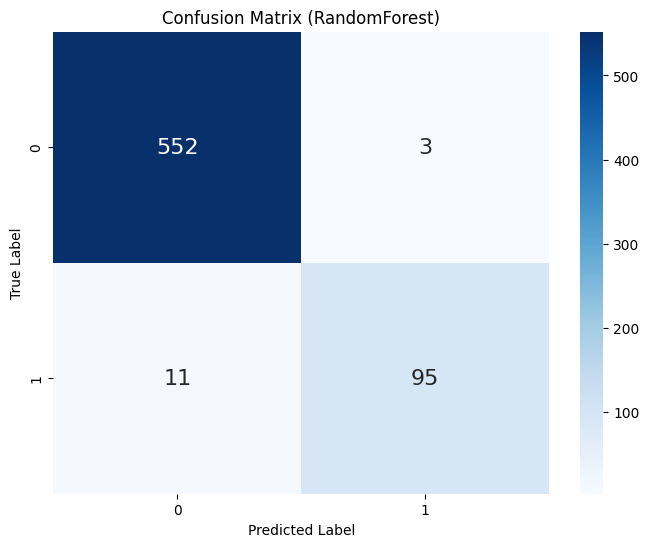


Details from Confusion Matrix:
- True Positives (TP): 95
- True Negatives (TN): 552
- False Positives (FP): 3
- False Negatives (FN): 11
Specificity (True Negative Rate): 0.9946

Average Precision (AP) Score: 0.9776


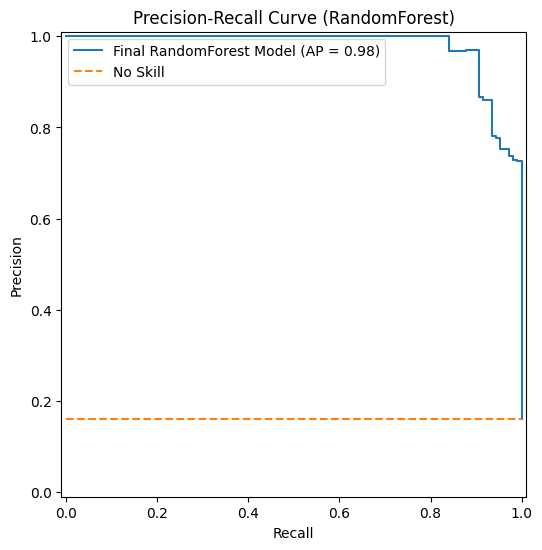


Time Information:
- Prediction Time on Validation Data: 0.0765 seconds


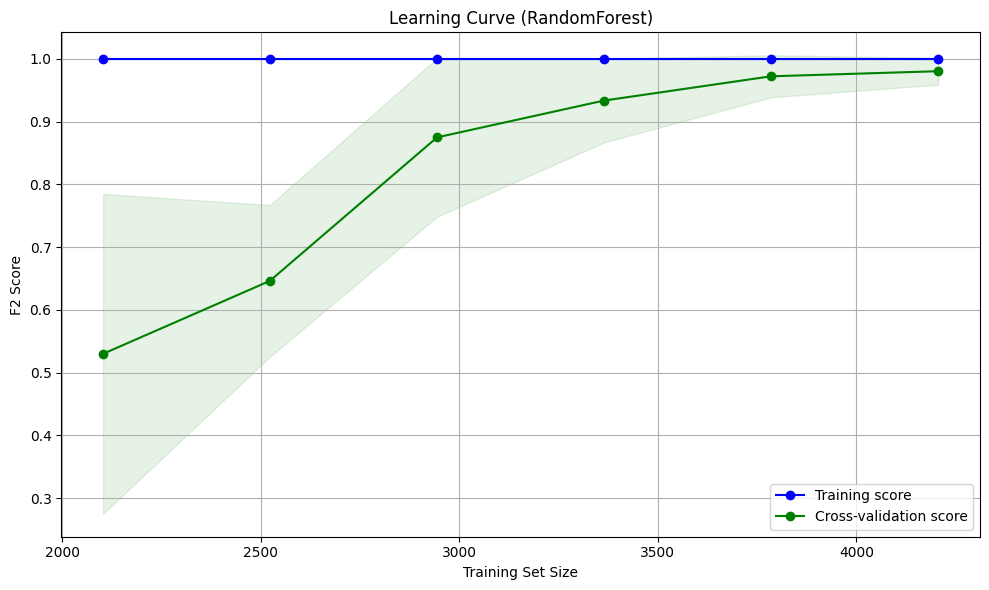

In [22]:
# Perform predictions on the test data
start_time_pred = time.time()
y_pred = rf_model.predict(X_val)
y_pred_proba = rf_model.predict_proba(X_val)[:, 1]
end_time_pred = time.time()
prediction_time = end_time_pred - start_time_pred

# Display Best Hyperparameters
print("Best Hyperparameters Used for RandomForest:")
for param, value in best_params.items():
    print(f"- {param}: {value}")

# Display F2-Score
f2 = fbeta_score(y_val, y_pred, beta=2, zero_division=0)
f2_scorer = make_scorer(fbeta_score, beta=2)
print(f"\nF2-Score (Validation Set): {f2:.4f}")

# Display Confusion Matrix
print("\nConfusion Matrix:")
cm = confusion_matrix(y_val, y_pred)
print(cm)

# Visualize Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(
    cm,
    annot=True,
    fmt="d",
    cmap="Blues",
    xticklabels=rf_model.classes_,
    yticklabels=rf_model.classes_,
    annot_kws={"size": 16},
)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix (RandomForest)")
plt.show()

# Extract TP, TN, FP, FN from Confusion Matrix (assuming positive class is 1)
tn, fp, fn, tp = cm.ravel()
print(f"\nDetails from Confusion Matrix:")
print(f"- True Positives (TP): {tp}")
print(f"- True Negatives (TN): {tn}")
print(f"- False Positives (FP): {fp}")
print(f"- False Negatives (FN): {fn}")

# Display Specificity (True Negative Rate)
specificity = tn / (tn + fp) if (tn + fp) > 0 else 0
print(f"Specificity (True Negative Rate): {specificity:.4f}")

# Display Precision-Recall Curve and Average Precision (AP)
precision, recall, _ = precision_recall_curve(y_val, y_pred_proba)
ap_score = average_precision_score(y_val, y_pred_proba)
print(f"\nAverage Precision (AP) Score: {ap_score:.4f}")

# Plot Precision-Recall Curve
fig, ax = plt.subplots(figsize=(6, 10))
pr_display = PrecisionRecallDisplay(
    precision=precision,
    recall=recall,
    average_precision=ap_score,
    estimator_name="Final RandomForest Model",
)
pr_display.plot(ax=ax)
no_skill = len(y_val[y_val == 1]) / len(y_val)
ax.plot([0, 1], [no_skill, no_skill], linestyle="--", label="No Skill")
ax.set_title("Precision-Recall Curve (RandomForest)")
ax.legend()
plt.show()

# Time Information
print("\nTime Information:")
print(f"- Prediction Time on Validation Data: {prediction_time:.4f} seconds")

# Generate learning curve
train_sizes, train_scores, test_scores = learning_curve(
    estimator=rf_model,
    X=X_train,
    y=y_train,
    cv=5,
    scoring=f2_scorer,
    n_jobs=-1,
    train_sizes=np.linspace(0.1, 1.0, 10),
    verbose=0,
)

train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

# Plot Learning Curve
plt.figure(figsize=(10, 6))
plt.plot(train_sizes, train_scores_mean, "o-", color="blue", label="Training score")
plt.plot(
    train_sizes, test_scores_mean, "o-", color="green", label="Cross-validation score"
)
plt.fill_between(
    train_sizes,
    train_scores_mean - train_scores_std,
    train_scores_mean + train_scores_std,
    alpha=0.1,
    color="blue",
)
plt.fill_between(
    train_sizes,
    test_scores_mean - test_scores_std,
    test_scores_mean + test_scores_std,
    alpha=0.1,
    color="green",
)

plt.title("Learning Curve (RandomForest)")
plt.xlabel("Training Set Size")
plt.ylabel("F2 Score")
plt.legend(loc="best")
plt.grid(True)
plt.tight_layout()
plt.show()

# 7. Model Improvement

### Feature Selection

In [11]:
# Get feature importances from the model
importances = rf_model.feature_importances_

# Get OHE column names
ohe_columns = X_train.columns

# Combine into a DataFrame
importance_df = pd.DataFrame({'feature': ohe_columns, 'importance': importances})

# Create a new column with original feature names (removing the category suffix)
importance_df['original_feature'] = importance_df['feature'].str.extract(r'^([^_]+)')

# Aggregate by original feature
aggregated_importance = importance_df.groupby('original_feature')['importance'].sum().sort_values(ascending=False)

# Display the results
display(aggregated_importance)

,importance
original_feature,
AvgWorkHours,0.066670
Age,0.061292
TotalWorkingYears,0.053399
YearsAtCompany,0.051944
EnvironmentSatisfaction,0.048526
JobRole,0.045895
YearsWithCurrManager,0.045353
MonthlyIncome,0.044627
JobSatisfaction,0.043829


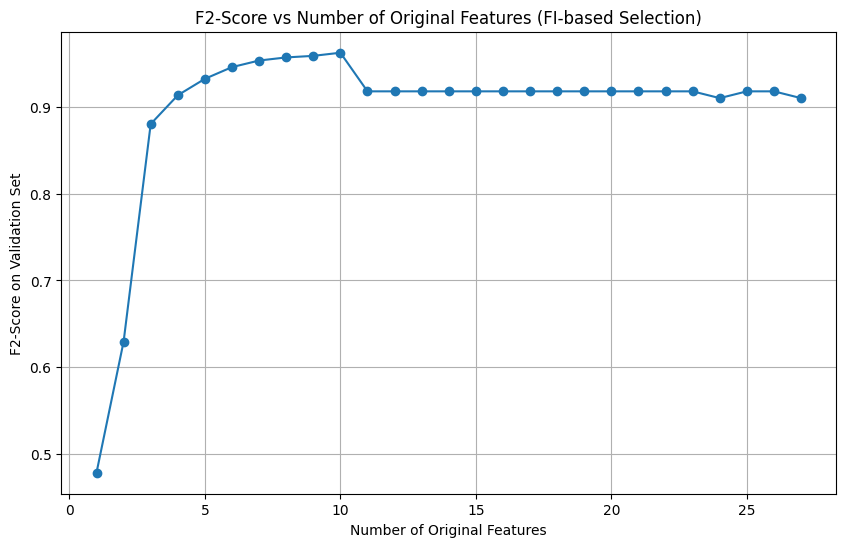

In [23]:
nominal_columns = ['BusinessTravel', 'Department', 'EducationField', 'Gender', 'JobRole', 'MaritalStatus']

# Get all OHE columns from X_train
all_ohe_cols = X_train.columns

# Map to original features
feature_map = pd.DataFrame({
    'feature': all_ohe_cols
})

# If the format is consistent: feature_category (e.g., gender_Male)
feature_map['original_feature'] = feature_map['feature'].apply(
    lambda x: next((col for col in nominal_columns if x.startswith(col + '_')), x)
)

# Get feature importances from the model
feature_map['importance'] = rf_model.feature_importances_

# Aggregate importance per original feature
agg_importance = feature_map.groupby('original_feature')['importance'].sum().sort_values()

results = []
original_features_ordered = agg_importance.index.tolist()

for i in range(len(original_features_ordered)):
    # Select original features to keep
    kept_original = original_features_ordered[i:]

    # Get relevant OHE columns
    kept_ohe_cols = feature_map[feature_map['original_feature'].isin(kept_original)]['feature'].tolist()

    # Subset all data
    X_train_sel = X_train[kept_ohe_cols]
    X_val_sel = X_val[kept_ohe_cols]
    y_val_sel = y_val

    # Train and evaluate
    model = RandomForestClassifier(**best_params, random_state=42)
    model.fit(X_train_sel, y_train)
    y_pred = model.predict(X_val_sel)
    f2 = fbeta_score(y_val_sel, y_pred, beta=2, zero_division=0)

    results.append({
        'num_original_features': len(kept_original),
        'f2_score': f2
    })

results_df = pd.DataFrame(results)

plt.figure(figsize=(10, 6))
plt.plot(results_df['num_original_features'], results_df['f2_score'], marker='o')
plt.xlabel("Number of Original Features")
plt.ylabel("F2-Score on Validation Set")
plt.title("F2-Score vs Number of Original Features (FI-based Selection)")
plt.grid(True)
plt.show()

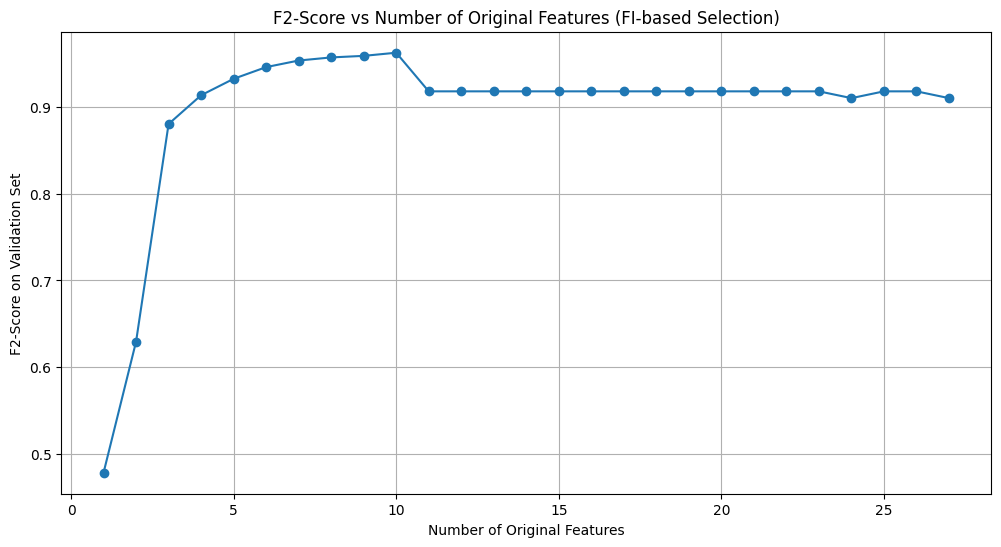

In [24]:
plt.figure(figsize=(12, 6))
plt.plot(results_df['num_original_features'], results_df['f2_score'], marker='o')
plt.xlabel("Number of Original Features")
plt.ylabel("F2-Score on Validation Set")
plt.title("F2-Score vs Number of Original Features (FI-based Selection)")
plt.grid(True)
plt.show()

In [13]:
# Get the 10 most important original features
top_10_original_features = agg_importance.sort_values(ascending=False).head(10).index.tolist()

# Get all OHE columns from those original features
selected_ohe_columns = feature_map[feature_map['original_feature'].isin(top_10_original_features)]['feature'].tolist()

# Subset all datasets
X_train_top10 = X_train[selected_ohe_columns]
X_val_top10 = X_val[selected_ohe_columns]
X_test_top10 = X_test[selected_ohe_columns]

# Retrain the model
rf_top10 = RandomForestClassifier(**best_params, random_state=42)
rf_top10.fit(X_train_top10, y_train)

# Evaluate on validation set
y_val_pred = rf_top10.predict(X_val_top10)
f2_val = fbeta_score(y_val, y_val_pred, beta=2, zero_division=0)

print(f"F2-Score on Validation Set (Top 10 Features): {f2_val:.4f}")

# Evaluate on test set
y_test_pred = rf_top10.predict(X_test_top10)
f2_test = fbeta_score(y_test, y_test_pred, beta=2, zero_division=0)
print(f"F2-Score on Test Set (Top 10 Features): {f2_test:.4f}")

# Confusion Matrix
cm = confusion_matrix(y_test, y_test_pred)
print("\nConfusion Matrix (Test Set):")
print(cm)

F2-Score on Validation Set (Top 10 Features): 0.9623
F2-Score on Test Set (Top 10 Features): 0.9533

Confusion Matrix (Test Set):
[[550   5]
 [  5 102]]


In [15]:
# Get top 10 original features by aggregated importance
top_10_original_features = agg_importance.sort_values(ascending=False).head(10).index.tolist()

# Get all OHE column names corresponding to those original features
top_10_ohe_columns = feature_map[feature_map['original_feature'].isin(top_10_original_features)]['feature'].tolist()

# Print in requested format
print(f"Number of original features: {len(top_10_original_features)}")
print("Original feature columns:", top_10_original_features)

print(f"\nNumber of OHE features: {len(top_10_ohe_columns)}")
print("OHE feature columns:", top_10_ohe_columns)

Number of original features: 10
Original feature columns: ['AvgWorkHours', 'Age', 'TotalWorkingYears', 'YearsAtCompany', 'EnvironmentSatisfaction', 'JobRole', 'YearsWithCurrManager', 'MonthlyIncome', 'JobSatisfaction', 'DistanceFromHome']

Number of OHE features: 17
OHE feature columns: ['Age', 'DistanceFromHome', 'MonthlyIncome', 'TotalWorkingYears', 'YearsAtCompany', 'YearsWithCurrManager', 'EnvironmentSatisfaction', 'JobSatisfaction', 'AvgWorkHours', 'JobRole_Human Resources', 'JobRole_Laboratory Technician', 'JobRole_Manager', 'JobRole_Manufacturing Director', 'JobRole_Research Director', 'JobRole_Research Scientist', 'JobRole_Sales Executive', 'JobRole_Sales Representative']


### Threshold Tuning

Best Threshold: 0.50 with F2-Score: 0.9623


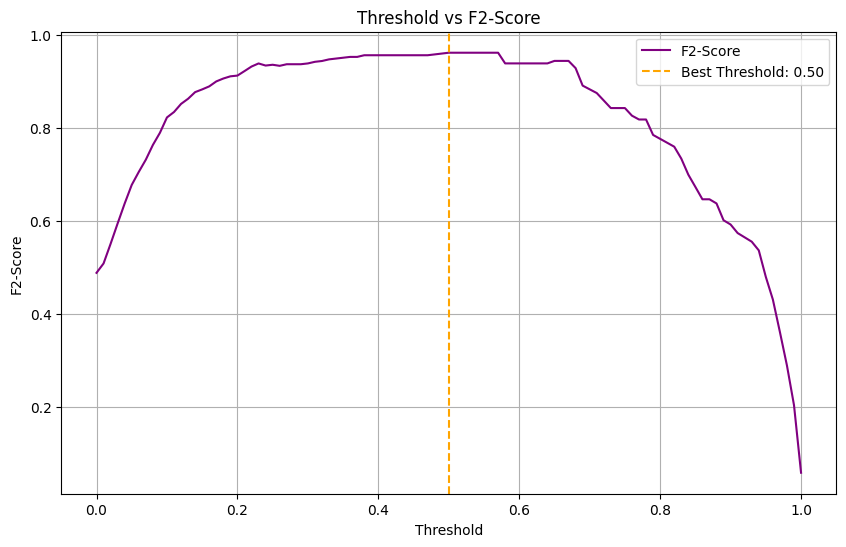

In [19]:
# Get predicted probabilities on the validation set
y_val_proba = rf_top10.predict_proba(X_val_top10)[:, 1]

# Try different threshold values from 0.00 to 1.00
thresholds = np.arange(0.0, 1.01, 0.01)
f2_scores = []

for thresh in thresholds:
    # Convert probabilities to binary predictions using the current threshold
    y_val_pred_thresh = (y_val_proba >= thresh).astype(int)

    # Calculate F2-Score for the current threshold
    score = fbeta_score(y_val, y_val_pred_thresh, beta=2, zero_division=0)
    f2_scores.append(score)

# Find the threshold that gives the highest F2-Score
best_thresh_idx = np.argmax(f2_scores)
best_threshold = thresholds[best_thresh_idx]
best_f2 = f2_scores[best_thresh_idx]

print(f"Best Threshold: {best_threshold:.2f} with F2-Score: {best_f2:.4f}")

# Plot F2-Score vs Threshold
plt.figure(figsize=(10, 6))
plt.plot(thresholds, f2_scores, label='F2-Score', color='purple')
plt.axvline(x=best_threshold, color='orange', linestyle='--', label=f'Best Threshold: {best_threshold:.2f}')
plt.xlabel('Threshold')
plt.ylabel('F2-Score')
plt.title('Threshold vs F2-Score')
plt.legend()
plt.grid(True)
plt.show()

# 8. Final Evaluation

Best Hyperparameters Used for RandomForest:
- criterion: entropy
- max_depth: None
- max_features: sqrt
- min_samples_leaf: 1
- min_samples_split: 2
- n_estimators: 300

F2-Score (Test Set): 0.9533

Confusion Matrix:
[[550   5]
 [  5 102]]


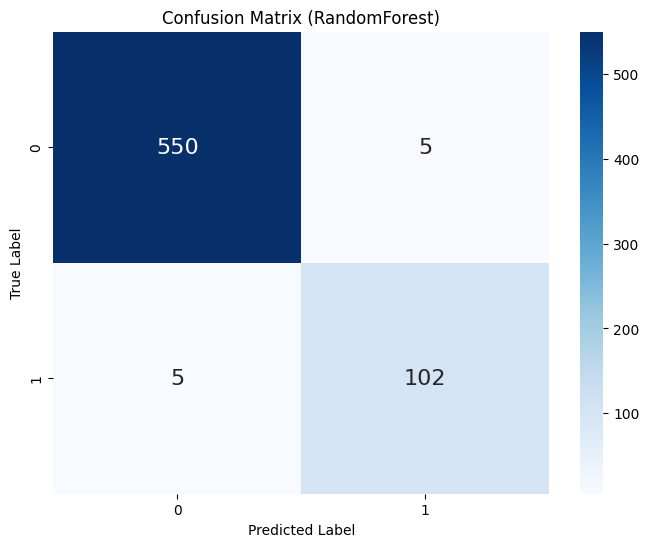


Details from Confusion Matrix:
- True Positives (TP): 102
- True Negatives (TN): 550
- False Positives (FP): 5
- False Negatives (FN): 5
Specificity (True Negative Rate): 0.9910

Average Precision (AP) Score: 0.9861


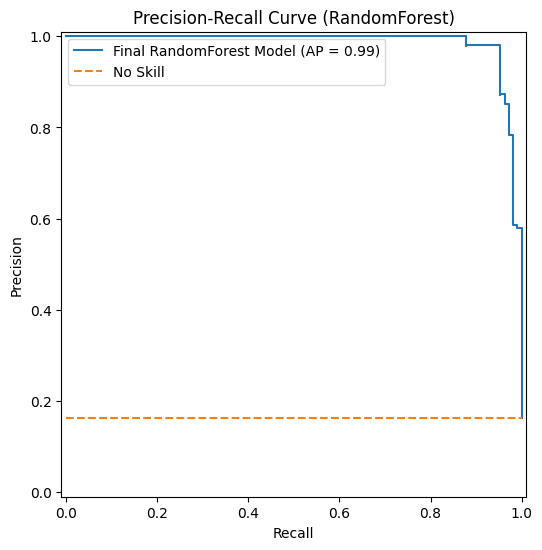

In [28]:
# Perform predictions on the test data
start_time_pred = time.time()
y_pred = rf_top10.predict(X_test_top10)
y_pred_proba = rf_top10.predict_proba(X_test_top10)[:, 1]
end_time_pred = time.time()
prediction_time = end_time_pred - start_time_pred

# Display Best Hyperparameters
print("Best Hyperparameters Used for RandomForest:")
for param, value in best_params.items():
    print(f"- {param}: {value}")

# Display F2-Score
f2 = fbeta_score(y_test, y_pred, beta=2, zero_division=0)
f2_scorer = make_scorer(fbeta_score, beta=2)
print(f"\nF2-Score (Test Set): {f2:.4f}")

# Display Confusion Matrix
print("\nConfusion Matrix:")
cm = confusion_matrix(y_test, y_pred)
print(cm)

# Visualize Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(
    cm,
    annot=True,
    fmt="d",
    cmap="Blues",
    xticklabels=rf_top10.classes_,
    yticklabels=rf_top10.classes_,
    annot_kws={"size": 16},
)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix (RandomForest)")
plt.show()

# Extract TP, TN, FP, FN from Confusion Matrix (assuming positive class is 1)
tn, fp, fn, tp = cm.ravel()
print(f"\nDetails from Confusion Matrix:")
print(f"- True Positives (TP): {tp}")
print(f"- True Negatives (TN): {tn}")
print(f"- False Positives (FP): {fp}")
print(f"- False Negatives (FN): {fn}")

# Display Specificity (True Negative Rate)
specificity = tn / (tn + fp) if (tn + fp) > 0 else 0
print(f"Specificity (True Negative Rate): {specificity:.4f}")

# Display Precision-Recall Curve and Average Precision (AP)
precision, recall, _ = precision_recall_curve(y_test, y_pred_proba)
ap_score = average_precision_score(y_test, y_pred_proba)
print(f"\nAverage Precision (AP) Score: {ap_score:.4f}")

# Plot Precision-Recall Curve
fig, ax = plt.subplots(figsize=(6, 10))
pr_display = PrecisionRecallDisplay(
    precision=precision,
    recall=recall,
    average_precision=ap_score,
    estimator_name="Final RandomForest Model",
)
pr_display.plot(ax=ax)
no_skill = len(y_test[y_test == 1]) / len(y_test)
ax.plot([0, 1], [no_skill, no_skill], linestyle="--", label="No Skill")
ax.set_title("Precision-Recall Curve (RandomForest)")
ax.legend()
plt.show()

# 9. Final Model Storage

In [20]:
joblib.dump({
    'model': rf_top10,
    'selected_ohe_columns': top_10_ohe_columns,
    'top_features': top_10_original_features
}, 'attrition_model.joblib')

['attrition_model.joblib']